## CS229 Assignment 1 - Coding Questions

We will be implementing the locally weighted logstic regression algorithm from question 2 of problem set 1 (https://see.stanford.edu/materials/aimlcs229/problemset1.pdf ) as part of Stanford's Engineering Everywhere CS229 Machine Learning course, taught by Andrew Ng in '08 ( https://see.stanford.edu/course/cs229 ).

(Example usage of functions is scattered throughout but with hidden output. Remove the ';' at the end of the cells to see output.)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We first initialise the $X$ and $Y$ training data matricies, and append the $x_0:=1$ column to our $X$ matrix, to account for the $\theta_0$ constant term of our regression and allow for vector notation and operations.

In [2]:
xData=np.asmatrix(np.loadtxt("data/x.dat"))
yData = np.loadtxt("data/y.dat")
m=len(xData)
n=3
lambdaConst=0.0001
extraCol=np.ones((m,1))
xData=np.append(extraCol, xData, axis=1)

We then setup a function to calculate the exponential weights $(\omega^{(1)},\dots,\omega^{(n)})$. We choose to output this as one $\omega \in \mathbb{R}^n$ vector.

In [3]:
def singleWeight(x, xi, tau):
    return np.exp(-(np.linalg.norm(x-xi)**2)/(2*tau*tau))

def weightVector(x, tau):
    return [singleWeight(x, xi, tau) for xi in xData]

In [4]:
weightVector(xData, 0.5);

Next we create our hypothesis function $h_\theta(x)=g(\theta^T x)$ for $g$ the logistic function. Note that our $x^{(i)}$ training data must be a column vector so we transpose the rows we remove from $X$ to pass into hypothesis function.

In [5]:
def g(t):
    return (1/(1+np.exp(-t)))

def hyp(theta, x):
    return np.asscalar(g(np.transpose(theta)*x))

In [6]:
hyp(np.ones((3,1)),np.transpose(xData[0]));

We now create the functions to get our $z \in \mathbb{R}^m$ values. This $z$ is defined in the assignment and used to calculate the gradient of the log likelihood function as $\nabla_\theta l(\theta) = X^Tz-\lambda\theta$, for $\lambda:=0.0001$.

In [7]:
def singleZ(wi, yi, xi, theta):
    return wi*(yi-hyp(theta, xi))

def zVector(w, Y, X, theta):
    return np.transpose(np.asmatrix([singleZ(w[i], Y[i], np.transpose(X[i]), theta) for i in list(range(m))]))

In [8]:
w = weightVector([1, -0.3, 0.7], 0.5)
theta = np.ones((n,))
zVector(w, yData, xData, theta).shape;

We now create the hessian matrix $H$ of second partial derivatives via the formula provided $H=X^TDX-\lambda I$. With $D$ a matrix in $\mathbb{R}^{mxm}$ as defined in the assignment.

In [9]:
def singleD(wi, xi, theta):
    return np.asscalar(-wi*hyp(theta, xi)*(1-hyp(theta,xi)))

def dMatrix(w, X, theta):
    array = [singleD(w[i], np.transpose(X[i]), theta) for i in list(range(m))]
    return np.diag(array)

def hessMatrix(w, X, theta):
    return np.transpose(X)*dMatrix(w, X, theta)*X-lambdaConst*np.identity(n)

We also create the a function to calculate the gradient of our log likelihood function using the $z$ vector and formula from above.
    

In [10]:
def gradVector(w, Y, X, theta):
    return np.transpose(X)*zVector(w, Y, X, theta)-lambdaConst*theta

Next we create the Locally Weighted Linear Regression (lwlr) function to tie all of the above functions together and perform the gradient descent. This updates our $\theta$ parameter in the direction of steepset descent each iteration.

In [11]:
def lwlr(X, Y, x, tau):
    w=weightVector(x, tau)
    theta=np.zeros((n,1))
    for i in list(range(200)):
        hess = hessMatrix(w, X, theta)
        grad = gradVector(w, Y, X, theta)
        theta=theta-np.linalg.inv(hess)*grad
        
    return theta;

We also setup our prediction thresholding function, which translates the probabilities form our hypothesis function into the desired class $\{0,1\}$ dependant on if our hypothesis value (which we are imbuing with a probabilistic interpretation) is above $0.5$ or not.

In [12]:
def predict(theta, x):
    hypValue = hyp(theta, x)
    return 1 if (hypValue>=0.5) else 0

Finally we train our model around a point 'xTrain', as marked by a blue 'x' in the first plot, and plot the training data provided vs the threshold our alogorithm produces. We set the parameter $\tau$ here which controls the falloff of the weight function. Note larger values of $\tau$ bring the algorithm closer to the standard logistic regression, whereas smaller values give more weight to close points.

In [13]:
xTrain = np.transpose(np.asmatrix([1,-0.1, 0.5]))
tau=10
trainedTheta = lwlr(xData, yData, xTrain, tau)

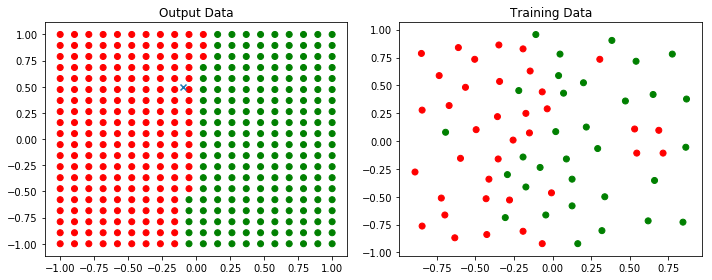

In [14]:
resolution=20
baseGridSpacing = np.linspace(-1,1,resolution)
xSpace = np.asarray([])
ySpace = np.asarray([])
for i in baseGridSpacing:
    xSpace=np.append(xSpace,(np.linspace(-1,1,resolution)))
for i in baseGridSpacing:
    ySpace=np.append(ySpace, np.full((resolution,1),i))

labels = [predict(trainedTheta, np.transpose(np.asmatrix([1,j,i]))) for i in baseGridSpacing for j in baseGridSpacing] 
colour= ['red' if l == 0 else 'green' for l in labels]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.scatter(xSpace, ySpace, c=colour)
ax1.scatter(np.asscalar(xTrain[1]), np.asscalar(xTrain[2]), marker='x')
ax1.set_title("Output Data")

labels = np.array(yData.astype(int))
colour= ['red' if l == 0 else 'green' for l in labels]
ax2.scatter(np.array(xData[:,1]),np.array(xData[:,2]),c=colour)
ax2.set_title("Training Data")

plt.tight_layout()

See you in assignment 2.